Importing libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Read data and split into train-val

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
X_train, X_val, y_train, y_val = model_selection.train_test_split(train_df.iloc[:, 0:-2], train_df.iloc[:, -1:], test_size=0.1, random_state = 0)
X_test, y_test = test_df.iloc[:, 0:-2], test_df.iloc[:, -1:]

print(f'Original training data shape: {train_df.shape}, Original Testing data shape: {test_df.shape}')
print(f'Shape of training data after splitting into training-validation ---> training data x: {X_train.shape}, training data y: {y_train.shape}, validation data x: {X_val.shape}, validation data y: {y_test.shape}'
)
print(f'Testing data shape -> test x: {X_test.shape}, test y: {y_test.shape}')

Original training data shape: (7352, 563), Original Testing data shape: (2947, 563)
Shape of training data after splitting into training-validation ---> training data x: (6616, 561), training data y: (6616, 1), validation data x: (736, 561), validation data y: (2947, 1)
Testing data shape -> test x: (2947, 561), test y: (2947, 1)


## Logistic Regression

In [3]:
# default parameters
logisticRegr = LogisticRegression(max_iter=1000000)
logisticRegr.fit(X_train, y_train.values.ravel())
score = logisticRegr.score(X_test, y_test)
print(score)

0.9606379368849678


## Linear SVM

In [4]:
svc = svm.LinearSVC(random_state=0, max_iter=1000000)
svc.fit(X_train, y_train.values.ravel())
linear_svm_score = metrics.accuracy_score(y_test.values.ravel(), svc.predict(X_test))
print(linear_svm_score)

0.9670851713607058


## Plain Decision Tree

0.8568035290125552


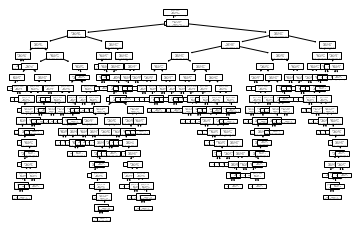

In [5]:
DecisionTree = tree.DecisionTreeClassifier(random_state=0)
decision_tree = DecisionTree.fit(X_train, y_train.values.ravel())
decision_tree_score = metrics.accuracy_score(y_test.values.ravel(), decision_tree.predict(X_test))
print(decision_tree_score)
nodes=tree.plot_tree(decision_tree.fit(X_train, y_train.values.ravel())) 

## Decision tree with limited depth

0.8771632168306752


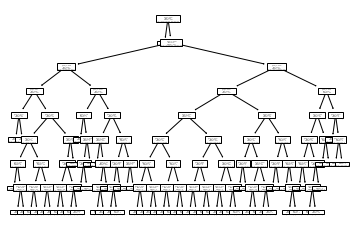

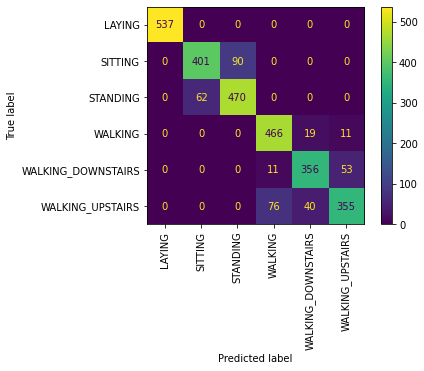

In [4]:
DecisionTree = tree.DecisionTreeClassifier(random_state=0, max_depth=8)
decision_tree = DecisionTree.fit(X_train, y_train.values.ravel())
decision_tree_score = metrics.accuracy_score(y_test.values.ravel(), decision_tree.predict(X_test))
print(decision_tree_score)
nodes=tree.plot_tree(decision_tree.fit(X_train, y_train.values.ravel())) 
metrics.plot_confusion_matrix(decision_tree, X_test, y_test, values_format='g', xticks_rotation='vertical')

## Gaussian Naive Bayes

In [7]:
naive_bayes = GaussianNB().fit(X_train, y_train.values.ravel())
naive_bayes_score = metrics.accuracy_score(y_test.values.ravel(), naive_bayes.predict(X_test))
print(naive_bayes_score)

0.7427892772310825


## Random Forest

In [8]:
random_forest_classifier = RandomForestClassifier(random_state=1)
random_forest = random_forest_classifier.fit(X_train, y_train.values.ravel())
random_forest_score = metrics.accuracy_score(y_test.values.ravel(), random_forest.predict(X_test))
print(random_forest_score)

0.9294197488971836


## Random Forest With Limited Depth

In [9]:
random_forest_classifier = RandomForestClassifier(max_depth=15, random_state=1)
random_forest = random_forest_classifier.fit(X_train, y_train.values.ravel())
random_forest_score = metrics.accuracy_score(y_test.values.ravel(), random_forest.predict(X_test))
print(random_forest_score)

0.9311163895486936
